In [65]:
import pandas as pd
pd.set_option("display.max_columns",None)
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
# load all the df
ingr_map_df = pd.read_pickle("src/data/kaggle_food_data/ingr_map.pkl")
raw_recipes_df = pd.read_csv("src/data/kaggle_food_data/RAW_recipes.csv")
raw_interaction_df = pd.read_csv("src/data/kaggle_food_data/RAW_interactions.csv") 

In [4]:
raw_dfs = [raw_interaction_df, raw_recipes_df]

## observing all df

In [5]:
ingr_map_df.head()

,raw_ingr,raw_words,processed,len_proc,replaced,count,id
0,"medium heads bibb or red leaf lettuce, washed,...",13,"medium heads bibb or red leaf lettuce, washed,...",73,lettuce,4507,4308
1,mixed baby lettuces and spring greens,6,mixed baby lettuces and spring green,36,lettuce,4507,4308
2,romaine lettuce leaf,3,romaine lettuce leaf,20,lettuce,4507,4308
3,iceberg lettuce leaf,3,iceberg lettuce leaf,20,lettuce,4507,4308
4,red romaine lettuce,3,red romaine lettuce,19,lettuce,4507,4308


id: map number to replaced variable

In [8]:
raw_recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


- name: recipe name
- id: recipe id
- minutes: minutes to prepare recipe
- contributor_id: user id who submitted recipe
- submitted: date recipe was submitted
- tags: tags for recipe
- nutrition: (calories (#), total fat (PDV), sugar (PDV) , sodium (PDV) , protein (PDV) , saturated fat (PDV) , and carbohydrates (PDV))
- n_steps: num of steps in recipe
- steps: text for recipe step, in order
- description: user-provided description

In [9]:
raw_interaction_df.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


# EDA

In [35]:
raw_recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


In [36]:
raw_interaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


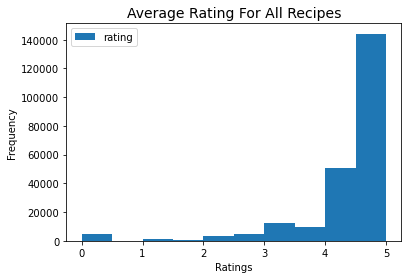

In [37]:
raw_interaction_df.groupby(["recipe_id"])[["rating"]].agg("mean").plot.hist()
plt.title("average rating for all recipes".title(), fontsize = 14)
plt.xlabel("ratings".title());

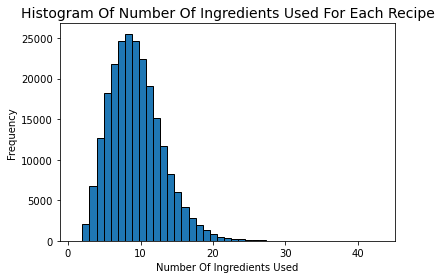

In [46]:
plt.hist(raw_recipes_df["n_ingredients"], bins=43, edgecolor = "black")
plt.title("Histogram of number of ingredients used for each recipe".title(), fontsize = 14);
plt.xlabel("number of ingredients used".title())
plt.ylabel("frequency".title());

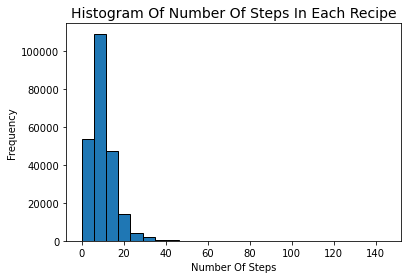

In [51]:
plt.hist(raw_recipes_df["n_steps"], bins=25, edgecolor = "black")
plt.title("Histogram of number of steps in each recipe".title(), fontsize = 14);
plt.xlabel("number of steps".title())
plt.ylabel("frequency".title());

In [27]:
len(ingr_map_df["id"].unique()) == len(ingr_map_df["replaced"].unique())

True

In [42]:
raw_recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [83]:
def prep_ingr(ingrs):
    toreturn = []
    ingrs = ingrs.strip("[]").replace("'","").replace('"',"").split(", ")
    for ingr in ingrs:
        toreturn.append("_".join(ingr.split(" ")))
    return " ".join(toreturn)

In [84]:
raw_recipes_df["processed_ingrs"] = raw_recipes_df["ingredients"].apply(prep_ingr)

In [85]:
raw_recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,processed_ingrs
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,winter_squash mexican_seasoning mixed_spice ho...
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,prepared_pizza_crust sausage_patty eggs milk s...
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,ground_beef yellow_onions diced_tomatoes tomat...
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,spreadable_cheese_with_garlic_and_herbs new_po...
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,tomato_juice apple_cider_vinegar sugar salt pe...


In [86]:
ingr_list = []
for ingr in raw_recipes_df["processed_ingrs"].values:
    [ingr_list.append(i) for i in ingr.split(" ")]
ingr_counts = Counter(ingr_list)

In [87]:
ingr_names = list(ingr_counts.keys())

In [114]:
ingr_count_df = pd.DataFrame(ingr_counts, index = ["counts"])
ingr_count_df = ingr_count_df.T

In [115]:
ingr_count_df.sort_values("counts", inplace = True, ascending=False)
ingr_count_df.reset_index(inplace= True)
ingr_count_df.columns = ["ingredients","counts"]

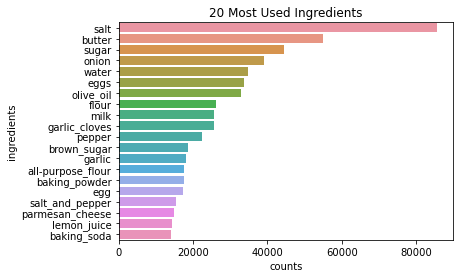

In [126]:
sns.barplot(data = ingr_count_df.iloc[:20,:],x = "counts", y = "ingredients")
plt.title("20 most used ingredients".title());

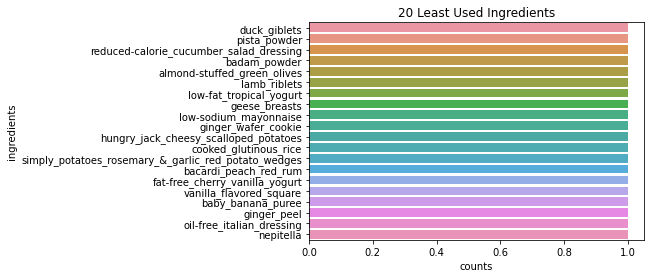

In [125]:
sns.barplot(data = ingr_count_df.iloc[-20:,:],x = "counts", y = "ingredients")
plt.title("20 least used ingredients".title());

In [140]:
tags_list = []
for t in raw_recipes_df["tags"]:
    [tags_list.append(x.replace("'","").replace('"',"").strip("[]")) for x in t.split(", ")]
tag_counts = Counter(tags_list)

In [149]:
tag_counts_df = pd.DataFrame(tag_counts, index = ["counts"]).T
tag_counts_df.reset_index(inplace=True)
tag_counts_df.columns = ["tags","counts"]
tag_counts_df.sort_values("counts", ascending=False, inplace=True)

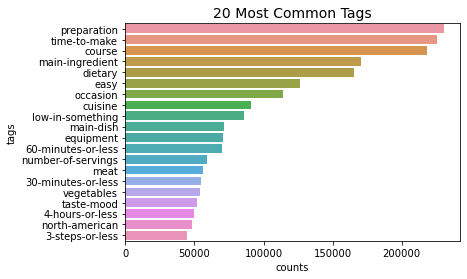

In [155]:
sns.barplot(data =tag_counts_df.iloc[:20,:], x = "counts", y= "tags")
plt.title("20 most common tags".title(), fontsize = 14);

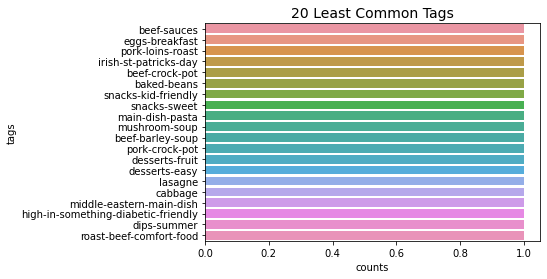

In [156]:
sns.barplot(data =tag_counts_df.iloc[-20:,:], x = "counts", y= "tags")
plt.title("20 least common tags".title(), fontsize = 14);

# most popular recipes

In [157]:
raw_interaction_df

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


In [181]:
recipe_rating_df = raw_interaction_df.groupby("recipe_id")[["rating"]].count().reset_index()

In [183]:
recipe_rating_df.columns = ["recipe_id","counts"]
recipe_rating_df

,recipe_id,counts
0,38,4
1,39,1
2,40,9
3,41,2
4,43,1
...,...,...
231632,537459,1
231633,537485,1
231634,537543,1
231635,537671,1


In [184]:
joined_recipe_df = recipe_rating_df.join(raw_recipes_df.set_index("id"), how="inner")

In [185]:
joined_recipe_df

,recipe_id,counts,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,processed_ingrs
38,120,5,low fat berry blue frozen dessert,1485,1533,1999-08-09,"['weeknight', 'time-to-make', 'course', 'prepa...","[170.9, 3.0, 120.0, 1.0, 6.0, 6.0, 12.0]",13,"['toss 2 cups berries with sugar', 'let stand ...","this is yummy and low-fat, it always turns out...","['blueberries', 'granulated sugar', 'vanilla y...",4,blueberries granulated_sugar vanilla_yogurt le...
39,122,2,biryani,265,1567,1999-08-29,"['weeknight', 'time-to-make', 'course', 'main-...","[1110.7, 90.0, 81.0, 15.0, 126.0, 82.0, 28.0]",17,['soak saffron in warm milk for 5 minutes and ...,"delhi, india","['saffron', 'milk', 'hot green chili peppers',...",26,saffron milk hot_green_chili_peppers onions ga...
40,123,2,best lemonade,35,1566,1999-09-05,"['60-minutes-or-less', 'time-to-make', 'course...","[311.1, 0.0, 308.0, 0.0, 0.0, 0.0, 27.0]",8,"['into a 1 quart jar with tight fitting lid , ...",this is from one of my first good house keepi...,"['sugar', 'lemons, rind of', 'fresh water', 'f...",6,sugar lemons rind_of fresh_water fresh_lemon_j...
41,124,1,carina s tofu vegetable kebabs,1460,1586,1999-09-03,"['weeknight', 'time-to-make', 'course', 'main-...","[536.1, 36.0, 128.0, 64.0, 58.0, 19.0, 21.0]",18,"['drain the tofu , carefully squeezing out exc...",this dish is best prepared a day in advance to...,"['extra firm tofu', 'eggplant', 'zucchini', 'r...",15,extra_firm_tofu eggplant zucchini red_pepper m...
43,128,2,best blackbottom pie,140,34879,1999-08-21,"['weeknight', 'time-to-make', 'course', 'cuisi...","[437.9, 29.0, 170.0, 11.0, 13.0, 54.0, 19.0]",35,"['graham cracker crust: in small bowl , combin...","sweet, chocolatey, yummy","['graham cracker crumbs', 'sugar', 'butter', '...",15,graham_cracker_crumbs sugar butter cornstarch ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231627,537323,1,zucchini and carrot casserole,50,62562,2007-06-01,"['60-minutes-or-less', 'time-to-make', 'course...","[538.2, 68.0, 24.0, 43.0, 32.0, 130.0, 7.0]",11,"['preheat oven to 350 degrees', 'saute onion ,...",this is one of my all-time favorite casseroles...,"['zucchini', 'carrots', 'butter', 'onion', 'mu...",10,zucchini carrots butter onion mushrooms cream_...
231629,537351,1,curried sweet potatoes cauliflower and green b...,44,283251,2007-06-01,"['60-minutes-or-less', 'time-to-make', 'course...","[96.3, 2.0, 17.0, 9.0, 5.0, 1.0, 6.0]",8,"['in a large nonstick skillet , heat oil over ...",this is from 365 meatless main dishes. i would...,"['vegetable oil', 'onion', 'red bell pepper', ...",11,vegetable_oil onion red_bell_pepper flour curr...
231631,537458,1,yeah man a jamaican drink,10,68960,2007-06-01,"['15-minutes-or-less', 'time-to-make', 'course...","[260.3, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]",4,"['combine all the ingredients , except for the...",this is a dorinda recipe. one cup equals 240 ...,"['rum', 'coconut liqueur', 'angostura bitters'...",6,rum coconut_liqueur angostura_bitters club_sod...
231632,537459,1,mexican layered beef and bean casserole,65,89831,2007-06-01,"['time-to-make', 'course', 'main-ingredient', ...","[932.4, 83.0, 50.0, 74.0, 90.0, 136.0, 23.0]",14,"['grease a 13 x 9-inch baking dish', 'in a ski...","this is delicious creamy ground beef, bean and...","['ground beef', 'fresh garlic', 'onion', 'gree...",15,ground_beef fresh_garlic onion green_bell_pepp...


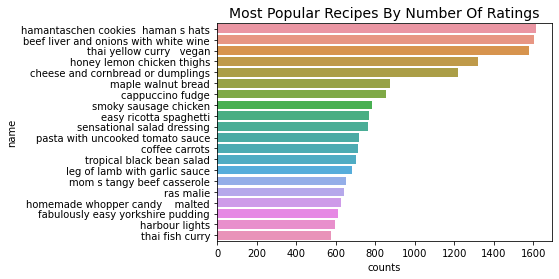

In [191]:
sns.barplot(data = joined_recipe_df.sort_values("counts", ascending = False).iloc[:20,:], x = "counts", y = "name");
plt.title("most popular recipes by number of ratings".title(), fontsize = 14);

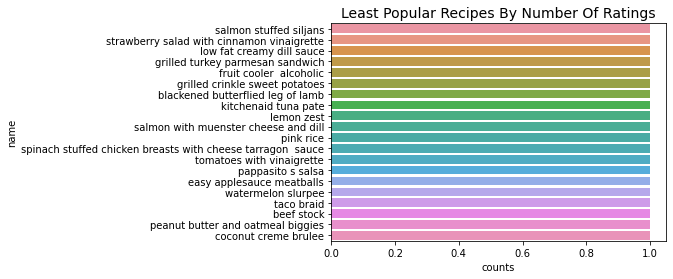

In [192]:
sns.barplot(data = joined_recipe_df.sort_values("counts").iloc[:20,:], x = "counts", y = "name");
plt.title("least popular recipes by number of ratings".title(), fontsize = 14);